In [18]:
# read top reasons
import pickle
with open('top_reasons.dat') as f:
    reason_top = pickle.load(f)
f.close()

In [3]:
reason_top

['home',
 'errand',
 'dining',
 'socialize',
 'work',
 'entertainment',
 'travelling / traffic',
 'dining, socialize',
 'socialize, dining',
 'exercise',
 'shopping',
 'socialize, entertainment']

In [19]:
# reading model trained on sensor only
file = 'auc_reason_sensor.dat'

import numpy as np

with open(file) as f:
    aucs, confs, labels = pickle.load(f)
f.close()
    
auc_top10 = list(np.array([]) for ii in range(len(reason_top)))
for (k,lab) in enumerate(labels):
    for (j,reason) in enumerate(reason_top):
        if reason in lab:
            ind = np.where(lab==reason)[0]
            auc_top10[j] = np.append(auc_top10[j], aucs[k][ind])

auc_mean_sensor = np.array([])
auc_ci_sensor = np.array([])
for (j, a) in enumerate(auc_top10):
    auc_mean_sensor = np.append(auc_mean_sensor, np.nanmean(a))
    auc_ci_sensor = np.append(auc_ci_sensor, 2*np.nanstd(a)/np.sqrt(208))


In [22]:
print np.nanmean(auc_mean_sensor)

0.69386992947


In [9]:
# reading model trained on both sensor and foursquare data

file = 'accuracy_new600_3_depth6_fsq2_distance2_longterm_vareta.dat'

with open(file) as f:
    aucs, confs, labels, aucs_fsq, confs_fsq = pickle.load(f)
f.close()
for (j,lab) in enumerate(labels):
    for (k,l) in enumerate(lab):
        labels[j][k] = l.replace('"','')
    
auc_top10 = list(np.array([]) for ii in range(len(state_top10)))
auc_top10_fsq = list(np.array([]) for ii in range(len(state_top10)))
conf_top10 = list([np.array([]) for iii in range(len(state_top10))] for ii in range(len(state_top10)))
conf_top10_fsq = list([np.array([]) for iii in range(len(state_top10))] for ii in range(len(state_top10)))
for (k,lab) in enumerate(labels):
    for (j,state) in enumerate(state_top10):
        if state in lab:
            ind = np.where(lab==state)[0]
            auc_top10[j] = np.append(auc_top10[j], aucs[k][ind])
            auc_top10_fsq[j] = np.append(auc_top10_fsq[j], aucs_fsq[k][ind])
            for (j2,state2) in enumerate(state_top10):
                if state2 in lab:
                    ind2 = np.where(lab==state2)[0]
                    conf_top10[j][j2] = np.append(conf_top10[j][j2], confs[k][ind,ind2])
                    conf_top10_fsq[j][j2] = np.append(conf_top10_fsq[j][j2], confs_fsq[k][ind,ind2])

auc_mean_all = np.array([])
auc_ci_all = np.array([])
for (j, a) in enumerate(auc_top10):
    auc_mean_all = np.append(auc_mean_all, np.nanmean(a))
    auc_ci_all = np.append(auc_ci_all, 2*np.nanstd(a)/np.sqrt(208))

auc_mean_fsq = np.array([])
auc_ci_fsq = np.array([])
for (i,a) in enumerate(auc_top10_fsq):
    auc_mean_fsq = np.append(auc_mean_fsq, np.nanmean(a))
    auc_ci_fsq = np.append(auc_ci_fsq, 2*np.nanstd(a)/np.sqrt(208))

[ 0.89341973  0.75603689  0.70688502  0.69626161  0.73892816  0.77341525
  0.49593496         nan  0.49849398         nan]


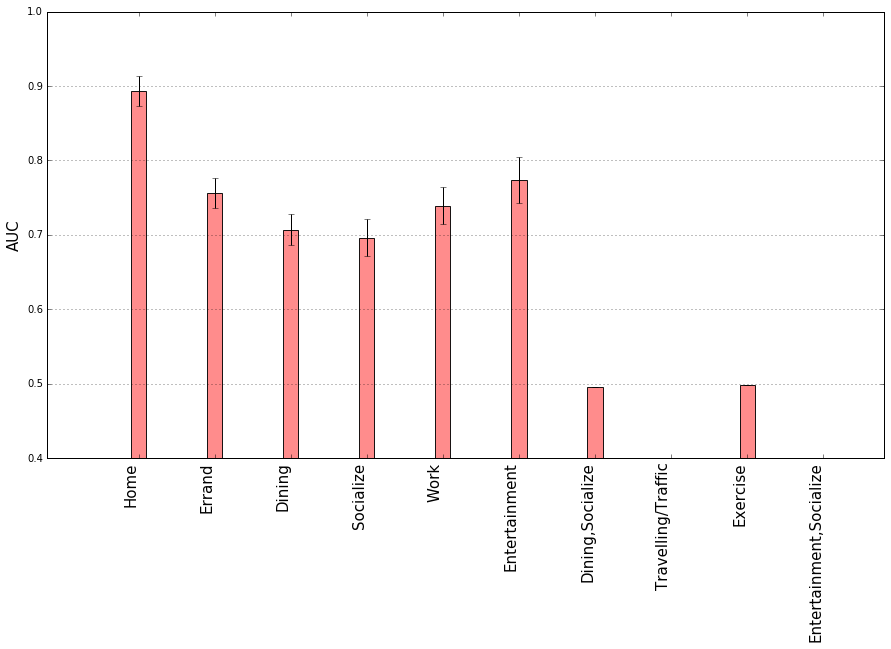

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,8))
w = 1/5.0
# plt.bar(np.arange(0,10,1), auc_mean_fsq, w, yerr=auc_ci_fsq, align='center',\
#          color=(.7,.7,.7), alpha=0.9, ecolor=(0,0,0))
plt.bar(np.arange(w,10+w,1), auc_mean_sensor, w, yerr=auc_ci_sensor, align='center', \
         color=(1,.5,.5), alpha=0.9, ecolor=(0,0,0))
# plt.bar(np.arange(2*w,10+2*w,1), auc_mean_all, w, yerr=auc_ci_all, align='center', \
#          color=(.3,.7,.3), alpha=0.9, ecolor=(0,0,0))
# plt.legend(['foursquare','sensor','sensor+foursquare'], loc='upper center')
plt.ylabel('AUC',fontsize=15,color=(0,0,0))
axes = plt.gca()
axes.set_xlim([-1, len(state_top10)])
axes.set_ylim([0.4, 1])
axes.yaxis.grid();
plt.xticks(np.arange(.2,10.2,1), state_top10, fontsize=15, color=(0,0,0), rotation=90, ha='right');
# plt.yticks(np.arange(.4,1,.05), np.arange(.4,1,.05), fontsize=12, color=(0,0,0));
print auc_mean_sensor
# print np.nanmean(auc_mean_fsq)
# print np.mean(auc_mean_all)


In [ ]:
conf = np.zeros([10,10])
for (i,c_row) in enumerate(conf_top10):
    for (j,c) in enumerate(c_row):
        conf[i,j] = np.sum(conf_top10[i][j])
cm_normalized = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_normalized, state_top10, title='confusion matrix - sensor+fousquare')

In [ ]:
conf = np.zeros([10,10])
for (i,c_row) in enumerate(conf_top10_fsq):
    for (j,c) in enumerate(c_row):
        conf[i,j] = np.sum(conf_top10_fsq[i][j])
cm_normalized = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_normalized, state_top10, title='confurion matrix: foursquare')
print cm_normalized[3,:]

In [ ]:
np.random.random(10)